### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

### DATASET INSIGHTS

In [2]:
#load the dataset
df = pd.read_csv('E:\ML\Demo_Data_Loan.csv')

In [3]:
#First five rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [4]:
#last five rows of the dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural,0


In [5]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan Approved      367 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 37.4+ KB


The dataset contains some string, float, int type data. It has 367 rows, and 13 columns.

In [6]:
#Dimension of the dataset
df.shape

(367, 13)

In [7]:
#Descriptive statistics of the dataset
df.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367,367.000000
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,NaN
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,0.070845
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN,0.256915
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN,0.000000


From the above cell, we can conclude that as the data type of Loan_ID, Gender, Married, Dependents, Education, Self_Employed, and Property_Area is categorical type, so their mean, std, min, 25%, 50%, 75%, and max are NaN and as for numerical type data, unique, top, and freq are NaN.

In [8]:
#Only for numerical data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
count,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,0.070845
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.256915
min,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,0.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,0.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,1.000000


In [9]:
#Only for categorical data
df.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP001015,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


#### Value Counts

Frequency Table for Gender
Female     70
Male      286
Name: Gender, dtype: int64


<AxesSubplot:>

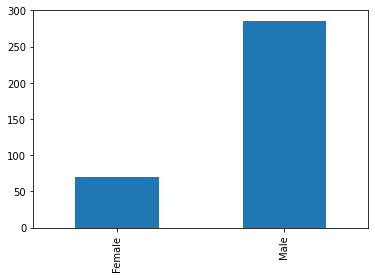

In [10]:
#Check how many values in each unique value for Gender
gender = df['Gender'].value_counts(ascending = True)
print ('Frequency Table for Gender')
print(gender)
gender.plot(kind='bar')

Frequency Table for Married
No     134
Yes    233
Name: Married, dtype: int64


<AxesSubplot:ylabel='Married'>

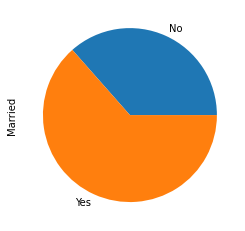

In [11]:
#Check how many values in each unique value for Married
married = df['Married'].value_counts(ascending = True)
print ('Frequency Table for Married')
print(married)
married.plot.pie()

Frequency Table for Dependents
3+     40
1      58
2      59
0     200
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

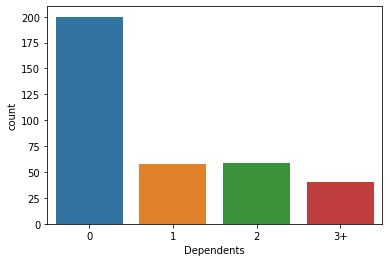

In [12]:
#Check how many values in each unique value for Dependents
dependents = df['Dependents'].value_counts(ascending = True)
print ('Frequency Table for Dependents')
print(dependents)
sns.countplot(x = 'Dependents', data = df)

Frequency Table for Property Area
Rural        111
Semiurban    116
Urban        140
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

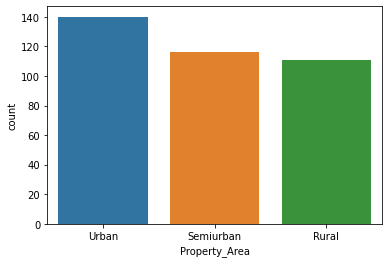

In [13]:
#Check how many values in each unique value for Property_Area
area = df['Property_Area'].value_counts(ascending = True)
print ('Frequency Table for Property Area')
print(area)
sns.countplot(x = 'Property_Area', data = df)

Frequency Table for Loan Approved
1     26
0    341
Name: Loan Approved, dtype: int64


<AxesSubplot:xlabel='Loan Approved', ylabel='count'>

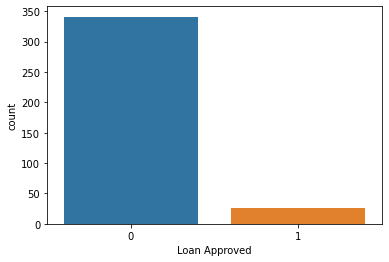

In [14]:
#Check how many values in each unique value for Loan Approved
loan_approved = df['Loan Approved'].value_counts(ascending = True)
print ('Frequency Table for Loan Approved')
print(loan_approved)
sns.countplot(x = 'Loan Approved', data = df)

Too much imbalanced!! Explained later.

#### Null Values Check

<AxesSubplot:>

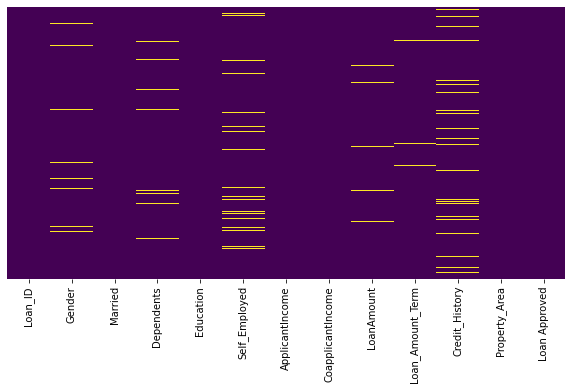

In [15]:
#Check Null values
fig = plt.figure(figsize = (10, 5))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

From the plot, we can see that there are missing values in some columns including Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History. Now the question is how many missing values?

In [16]:
#Check how many null values in each column
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan Approved         0
dtype: int64

Null value can be handled in preprocessing section

#### Histogram Distribution

<AxesSubplot:xlabel='Loan Approved', ylabel='Count'>

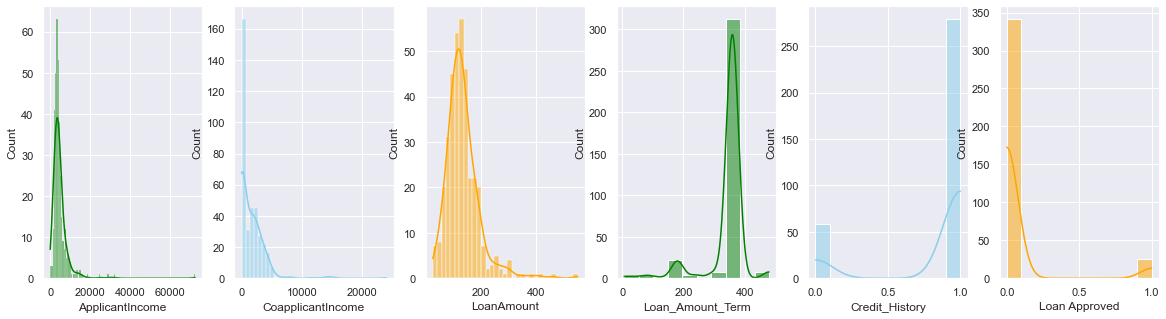

In [17]:
#Histogram for numerical data
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1,6, figsize=(20,5))

sns.histplot(data = df, x = "ApplicantIncome", kde = True, ax = axs[0], color='green')
sns.histplot(data = df, x = "CoapplicantIncome", kde = True, ax = axs[1], color='skyblue')
sns.histplot(data = df, x = "LoanAmount", kde = True, ax = axs[2], color='orange')
sns.histplot(data = df, x = "Loan_Amount_Term", kde = True, ax = axs[3], color='green')
sns.histplot(data = df, x = "Credit_History", kde = True, ax = axs[4], color='skyblue')
sns.histplot(data = df, x = "Loan Approved", kde = True, ax = axs[5], color='orange')

ApplicantIncome and CoapplicantIncome have high standard deviation and positively skewed. We have to convert it normal Distribution. The distribution of LoanAmount looks like close to normal. Loan_Amount_Term is negatively skewed. Credit_History and Loan Aprroved are showing no distribution, hardto say anything about these.

#### Outlier

<AxesSubplot:>

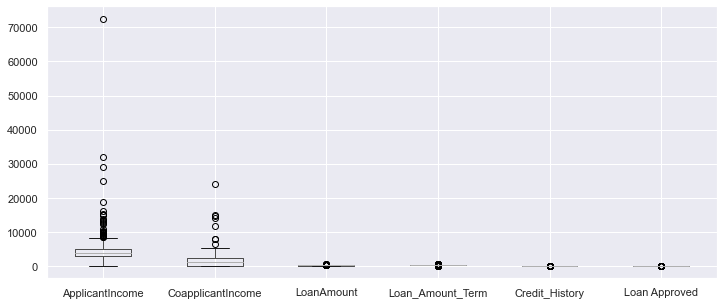

In [18]:
#Draw a boxplot to check the outliers
df.boxplot(figsize = (12, 5))

We can see that ApplicantIncome, CoapplicantIncome have more outliers, LoanAmount, Loan_Amount_Term have less outliers.

#### Pairplot

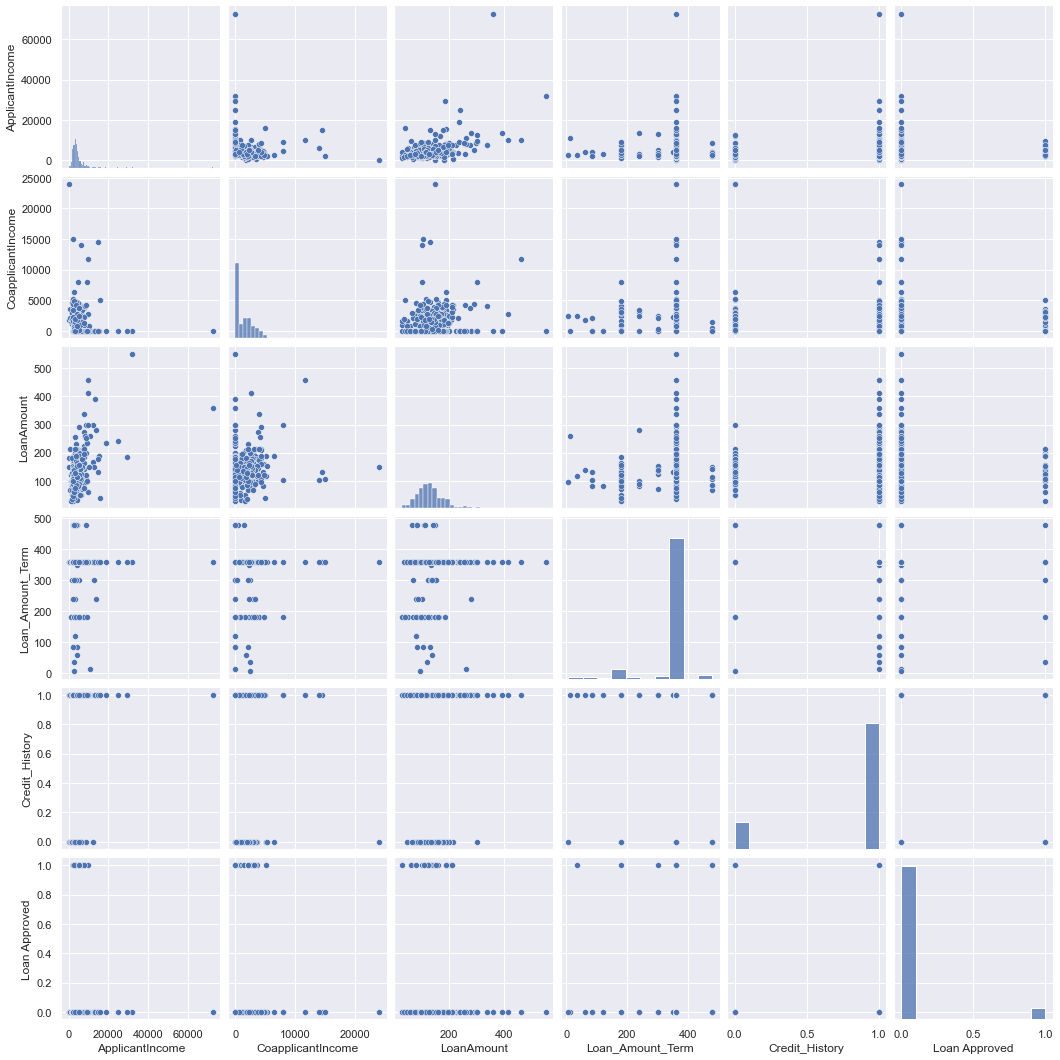

In [19]:
#Visualize data; pairwise bivariate distributions
sns.pairplot(df)

Diagonal plots represent hist.plot() i.e. histogram distribution and the remaining represent pairwise relationships.

#### Correlation

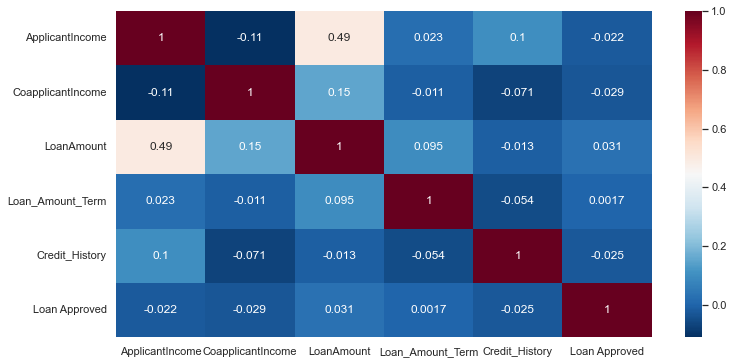

In [20]:
#heatmap for correlation between the numerical data
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu_r')
plt.show()

There is positive correlation between Loan Amount and Applicant Income. There is negative correlation between Credit History and Loan Amount Term.

### DATA PREPROCESSING

#### Remove Unnecessary Variables

In [21]:
#Loan id is not important to decide who is eligible for loan, so drop it
df.drop(['Loan_ID'], axis = 1, inplace = True)

#### Handle Null Values
In previous section, we see some null values. we will handle it now

In [22]:
#For aLl the variables who contain categorical data, replace null values by its mode value.
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

#For all the variables who contain numerical data, replace null values by its mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace = True)

In [23]:
#Now Check if there exists any null value or not
df.isnull().sum().any()

False

#### Handle Categorical value

In [24]:
#Label Encoding is used to convert the categorical values into numerical
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [25]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2,0
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2,0
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2,0
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2,0
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.000000,2,0
363,1,1,0,0,0,4158,709,115.0,360.0,1.000000,2,0
364,1,0,0,0,0,3250,1993,126.0,360.0,0.825444,1,0
365,1,1,0,0,0,5000,2393,158.0,360.0,1.000000,0,0


#### Feature Selection

In [26]:
#Feature Selection
X = df.drop(["Loan Approved"], axis = 1) #Remove Loan Approved column, select all other columns as features
y = df["Loan Approved"]          #Only Loan Approved as target

#### Handle Class Imbalance
In previous section, we can see in the target column loan approved, there are 7.08% class '1' and 95.52% class '0' data. That means there occurs severe class imbalance issue. We need to solve it. Otherwise the model will be biased for class 0. I will use oversampling technique to avoid overfitting problem. It creates samples for minority class to balance the minority and majority classes

In [27]:
#To solve the imbalance problem, I choose Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE()
balanced_X, balanced_y = smote.fit_resample(X, y)

After resampling- shape: Counter({0: 341, 1: 341})


<AxesSubplot:xlabel='count', ylabel='Loan Approved'>

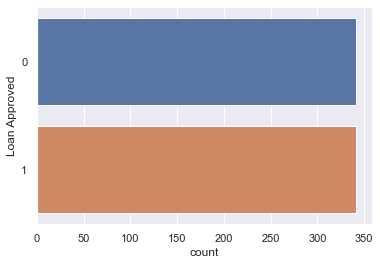

In [28]:
print('After resampling- shape:', Counter(balanced_y))
sns.countplot(y = balanced_y, data = df)

Now the Loan Approved is balanced!

#### Data Standardrization

In [29]:
#Standard Scale Normalization
scaler = StandardScaler()                 #Standardize features by removing the mean and scaling to unit variance.
scaler.fit(balanced_X)                    #Compute the mean and std to be used for later scaling.
balanced_X = scaler.transform(balanced_X) #Perform standardization by centering and scaling.

#### Dataset Split

In [30]:
#Split the dataset into 80% training and 20% test set.
X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size = 0.20)

In [31]:
print(balanced_X.shape, balanced_y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(682, 11) (682,)
(545, 11) (545,)
(137, 11) (137,)


### MODELS

#### Loss Function
To compute the cost, the way is to compute the absolute error among prediction and actual value. But a better loss function is the log loss function which is defined as :
-Sum( Log (Pred) * Actual + Log (1 - Pred ) * Actual ) / m

In [32]:
def compute_error(Predicted, Actual):
    logprobs = np.multiply(np.log(1e-15 + Predicted), Actual) + np.multiply(np.log(1e-15 + 1 - Predicted), 1 - Actual)
    cost = -np.sum(logprobs)/Actual.shape[0]
    return np.squeeze(cost)

#### Logistic Regression

In [33]:
#Create Logitsic Regression classifier
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)

#Predicting the test results
y_pred_lr = LR.predict(X_test)

#Evaluation on test set
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_loss = log_loss(y_test, y_pred_lr)
print("Accuracy:", lr_acc)
print("Loss:", lr_loss)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.6788321167883211
Loss: 11.09289161541478
[[40 25]
 [19 53]]
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        65
           1       0.68      0.74      0.71        72

    accuracy                           0.68       137
   macro avg       0.68      0.68      0.68       137
weighted avg       0.68      0.68      0.68       137



#### K Nearest Neighbors (KNN)

Text(0, 0.5, 'Mean Error')

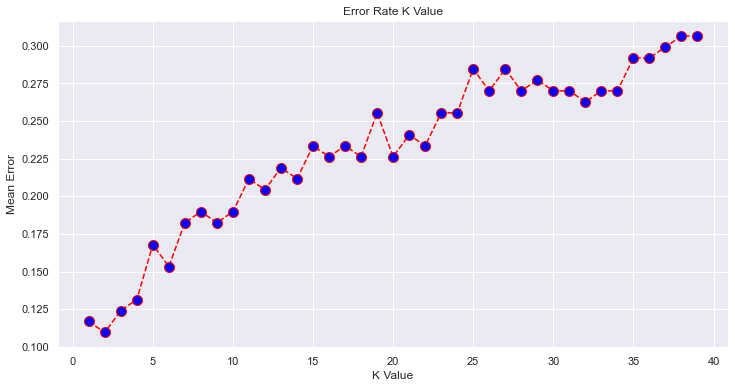

In [34]:
#Parameter tuning
error = []

#Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    #print(np.mean(pred_i != y_test))
    
#Plot the values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the graph, we can see that the mean error value is the lowest for k = 2.

In [35]:
#Create KNN classifier
KNN = KNeighborsClassifier(n_neighbors = 2)
KNN.fit(X_train, y_train)

#Predicting the test results
y_pred_knn = KNN.predict(X_test)

#Evaluation on test set
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_loss = log_loss(y_test, y_pred_knn)
print("Accuracy:", knn_acc)
print("Loss:", knn_loss)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8905109489051095
Loss: 3.7816470358453382
[[60  5]
 [10 62]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        65
           1       0.93      0.86      0.89        72

    accuracy                           0.89       137
   macro avg       0.89      0.89      0.89       137
weighted avg       0.89      0.89      0.89       137



#### Decision Tree Classifier

In [36]:
#Create Decision Tree classifier
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train, y_train)

#Predicting the test results
y_pred_dt = DT.predict(X_test)

#Evaluation on test set
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_loss = log_loss(y_test, y_pred_dt)
print("Accuracy:", dt_acc)
print("Loss:", dt_loss)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.927007299270073
Loss: 2.521107751359547
[[60  5]
 [ 5 67]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        65
           1       0.93      0.93      0.93        72

    accuracy                           0.93       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137



#### Random Forest Classifier

In [37]:
#Fitting Random Forest to the training set
rf = RandomForestClassifier(n_estimators = 5, random_state = 42)
rf.fit(X_train, y_train)

#Predicting the test results
y_pred_rf = rf.predict(X_test)

#Evaluation on test set
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_loss = log_loss(y_test, y_pred_rf)
print("Accuracy:", rf_acc)
print("Loss:", rf_loss)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9343065693430657
Loss: 2.2689998944623886
[[60  5]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        65
           1       0.93      0.94      0.94        72

    accuracy                           0.93       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137



#### Support Vector Machine

In [38]:
#Fitting Random Forest to the training set
svm = SVC(random_state = 42)
svm.fit(X_train, y_train)

#Predicting the test results
y_pred_svm = svm.predict(X_test)

#Evaluation on test set
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_loss = log_loss(y_test, y_pred_svm)
print("Accuracy:", svm_acc)
print("Loss:", svm_loss)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.8759124087591241
Loss: 4.285886095550024
[[56  9]
 [ 8 64]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        65
           1       0.88      0.89      0.88        72

    accuracy                           0.88       137
   macro avg       0.88      0.88      0.88       137
weighted avg       0.88      0.88      0.88       137



### Model Comparision

In [39]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM'], 
                        'Accuracy': [lr_acc*100, knn_acc*100, dt_acc*100, rf_acc*100, svm_acc*100],
                        'Loss': [lr_loss, knn_loss, dt_loss, rf_loss, svm_loss]})
compare.sort_values(by = 'Accuracy', ascending = True)

,Model,Accuracy,Loss
0,Logistic Regression,67.883212,11.092892
4,SVM,87.591241,4.285886
1,KNN,89.051095,3.781647
2,Decision Tree,92.700730,2.521108
3,Random Forest,93.430657,2.269000


In [40]:
'''
print(compute_error(y_pred_lr, y_test))
print(compute_error(y_pred_knn, y_test))
print(compute_error(y_pred_dt, y_test))
print(compute_error(y_pred_rf, y_test))
print(compute_error(y_pred_svm, y_test))
'''

'\nprint(compute_error(y_pred_lr, y_test))\nprint(compute_error(y_pred_knn, y_test))\nprint(compute_error(y_pred_dt, y_test))\nprint(compute_error(y_pred_rf, y_test))\nprint(compute_error(y_pred_svm, y_test))\n'